<a href="https://colab.research.google.com/github/cdario79/CrossSellingAssicuratvo/blob/main/Cross_Selling_Assicurativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CARICAMENTO LIBRERIE UTILIZZATE

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## DEFINIZIONE DELL'OBIETTIVO



**Obiettivo del progetto:**  
- Costruire un modello predittivo di machine learning in grado di prevedere quali clienti con un’assicurazione sanitaria sono propensi a sottoscrivere una polizza auto.

**Obiettivo aziendale:**
- Aumentare il tasso di conversione nelle vendite di polizze auto.
- Ottimizzare le campagne di marketing tramite targettizzazione intelligente.
- Ridurre i costi legati alle campagne poco efficaci.

**Tipo di problema di ML:** Classificazione binaria, dove:
- `Response = 1` → il cliente accetta l'offerta di cross-selling
- `Response = 0` → il cliente rifiuta l'offerta


## CARICAMENTO E COMPRENSIONE DEL DATASET

Il dataset `insurance_cross_sell.csv` contiene informazioni sui clienti con le seguenti variabili:
- `id`: identificativo univoco del cliente
- `Gender`: sesso del cliente
- `Age`: età del cliente
- `Driving_License`: se il cliente possiede la patente di guida (1 = sì, 0 = no)
- `Region_Code`: codice della regione di residenza del cliente
- `Previously_Insured`: se il cliente ha già un veicolo assicurato (1 = sì, 0 = no)
- `Vehicle_Age`: età del veicolo
- `Vehicle_Damage`: se il cliente ha avuto danni in passato al veicolo (1 = sì, 0 = no)
- `Annual_Premium`: importo del premio assicurativo annuale
- `PolicySalesChannel`: canale utilizzato per vendere la polizza (es. email, telefono, di persona)
- `Vintage`: giorni da cui il cliente è assicurato
- `Response`: se il cliente ha accettato l'offerta di cross-sell (1 = sì, 0 = no)

In [2]:
# Caricamento del dataset
url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/insurance_cross_sell.csv'
df = pd.read_csv(url)

In [3]:
# Mostrare le prime righe del dataset
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape

(381109, 12)

In [ ]:
# Verificare le informazioni generali sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.isnull().sum()  # Conta valori nulli per ogni colonna

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


## ESPLORAZIONE DEL DATASET (EDA - Exploratory Data Analysis)

### Distribuzione della variabile target Response

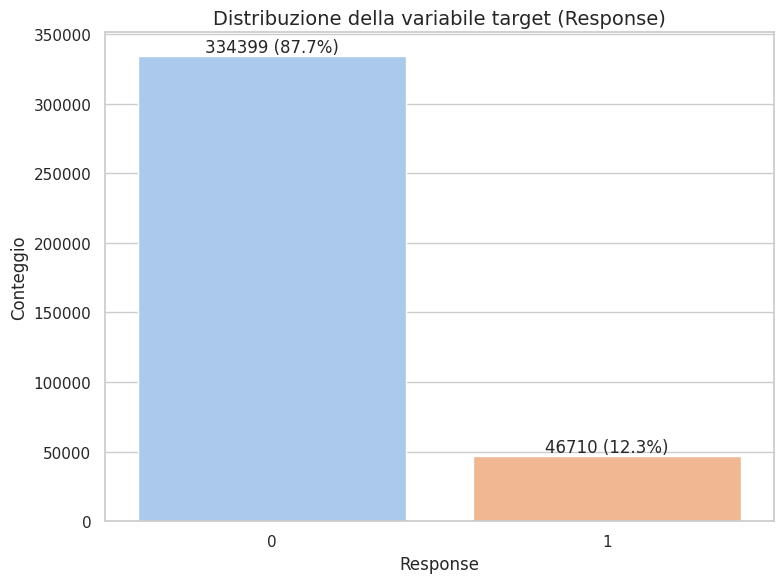

In [18]:
# Impostazioni estetiche generali
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Grafico a barre con hue e senza legenda
ax = sns.countplot(x='Response', hue='Response', data=df, palette='pastel', legend=False)

# Aggiunta titolo
plt.title('Distribuzione della variabile target (Response)', fontsize=14)

# Aggiunta delle etichette con percentuali e conteggi
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{count} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Asse e layout
plt.xlabel('Response')
plt.ylabel('Conteggio')
plt.tight_layout()
plt.show()

### Analisi univariata (colonne individuali)

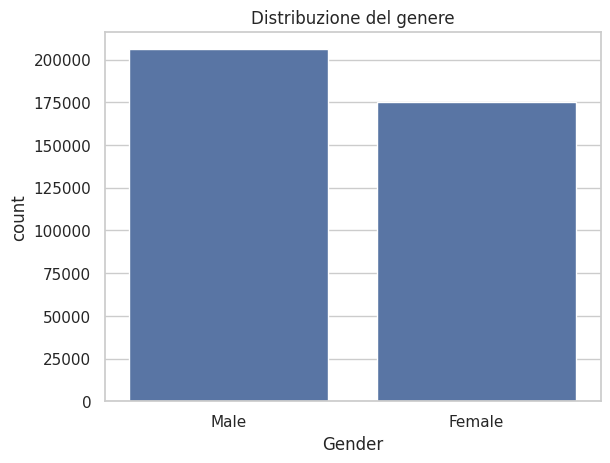

In [29]:
sns.countplot(x='Gender', data=df)
plt.title('Distribuzione del genere')
plt.show()

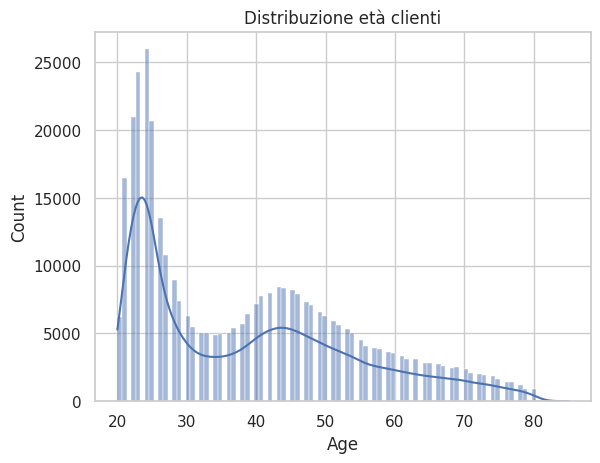

In [19]:
# Età
sns.histplot(df['Age'], kde=True)
plt.title('Distribuzione età clienti')
plt.show()

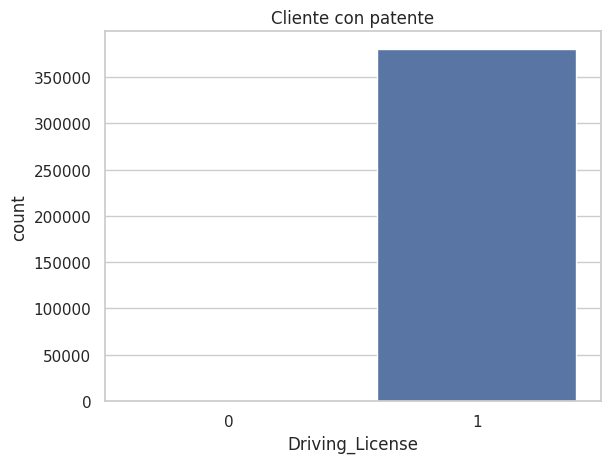

In [21]:
sns.countplot(x='Driving_License', data=df)
plt.title('Cliente con patente')
plt.show()

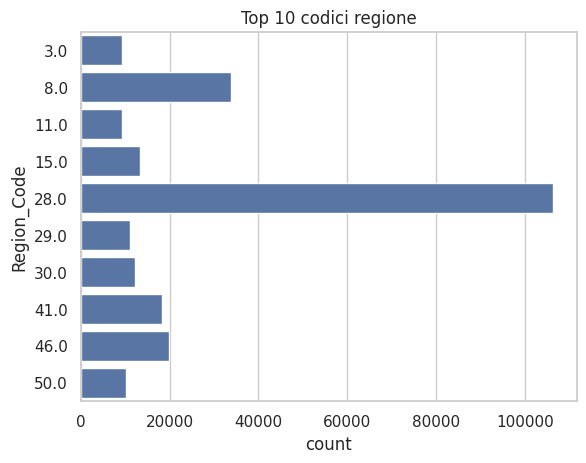

In [22]:
top_regions = df['Region_Code'].value_counts().head(10).index
sns.countplot(y='Region_Code', data=df[df['Region_Code'].isin(top_regions)])
plt.title('Top 10 codici regione')
plt.show()

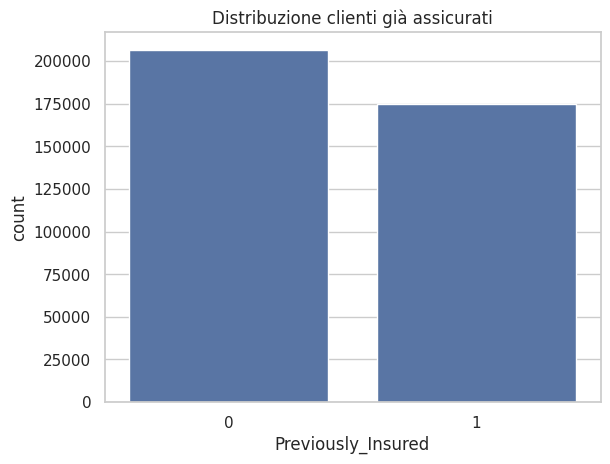

In [23]:
sns.countplot(x='Previously_Insured', data=df)
plt.title('Distribuzione clienti già assicurati')
plt.show()

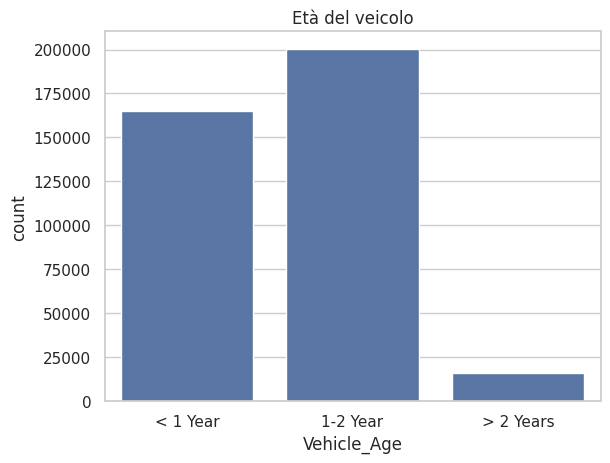

In [24]:
sns.countplot(x='Vehicle_Age', data=df, order=['< 1 Year', '1-2 Year', '> 2 Years'])
plt.title('Età del veicolo')
plt.show()

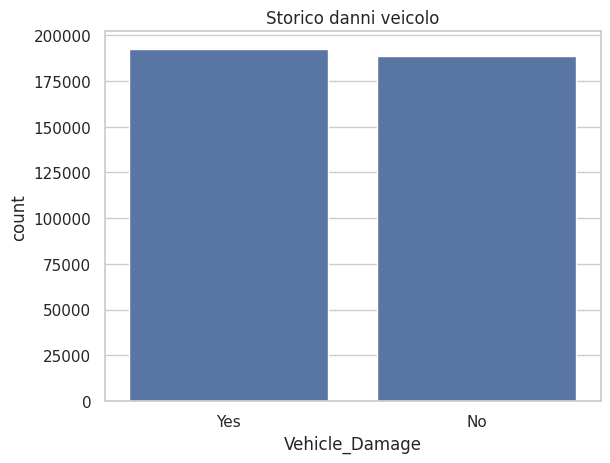

In [25]:
sns.countplot(x='Vehicle_Damage', data=df)
plt.title('Storico danni veicolo')
plt.show()

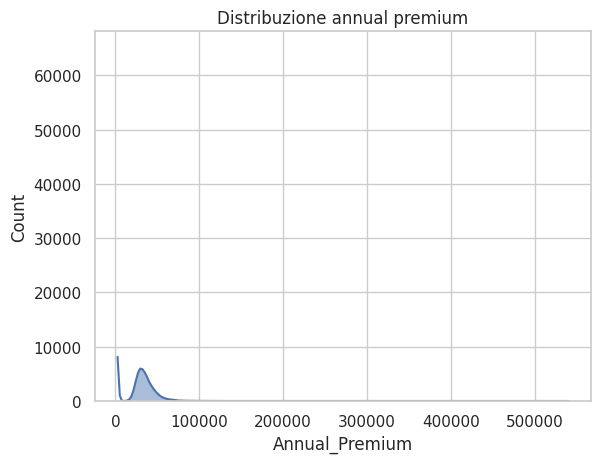

In [26]:
# Premio annuale
sns.histplot(df['Annual_Premium'], kde=True)
plt.title('Distribuzione annual premium')
plt.show()

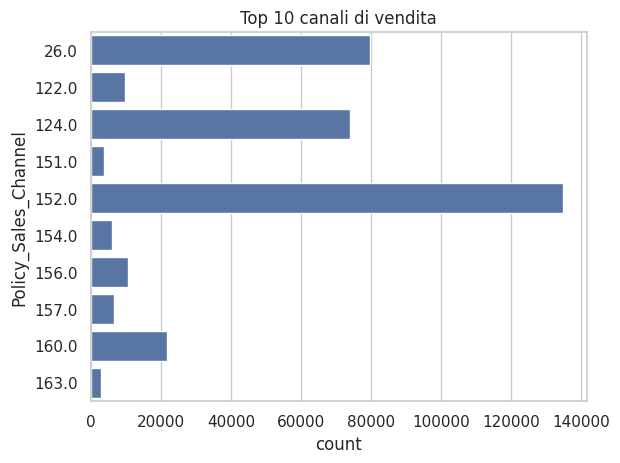

In [27]:
top_channels = df['Policy_Sales_Channel'].value_counts().head(10).index
sns.countplot(y='Policy_Sales_Channel', data=df[df['Policy_Sales_Channel'].isin(top_channels)])
plt.title('Top 10 canali di vendita')
plt.show()

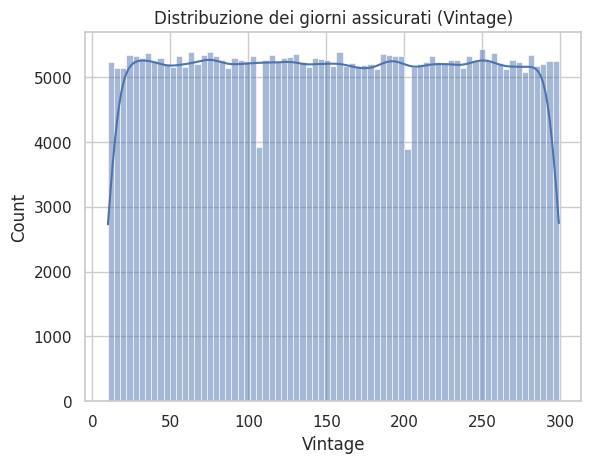

In [28]:
sns.histplot(df['Vintage'], kde=True)
plt.title('Distribuzione dei giorni assicurati (Vintage)')
plt.show()

### Matriche di correlazione tra le variabili numeriche

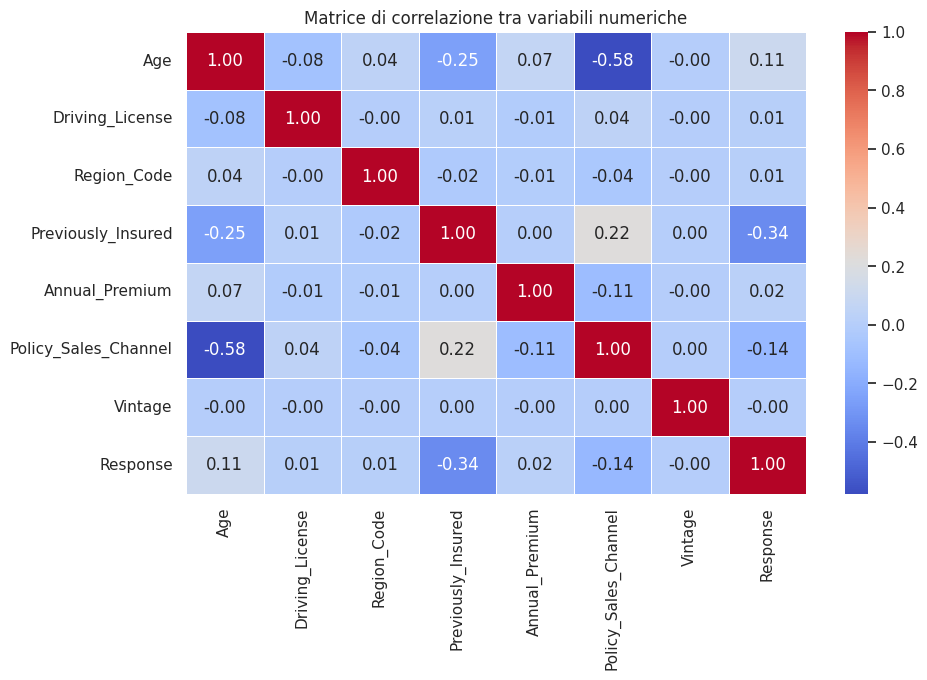

In [32]:
# Seleziona solo le colonne numeriche
df_numeriche = df.select_dtypes(include=['int64', 'float64'])
df_numeriche = df_numeriche.drop(columns=['id'])  # Rimuovi la colonna 'id'

# Calcola la matrice di correlazione
correlation_matrix = df_numeriche.corr()

# Visualizza con una heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice di correlazione tra variabili numeriche")
plt.show()

### Analisi bivariata (confronto con la variabile target)

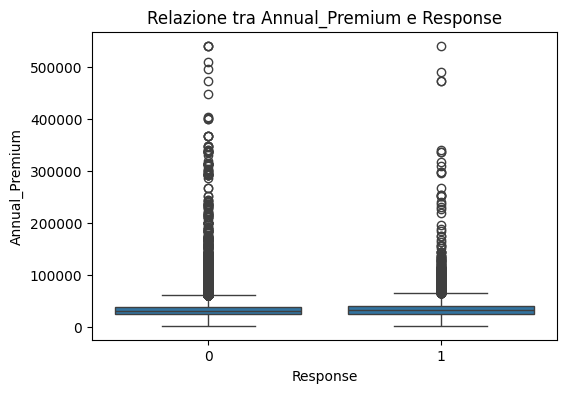

In [ ]:
# Relazione tra variabili (Annual_Premium vs Response)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Relazione tra Annual_Premium e Response')
plt.show()

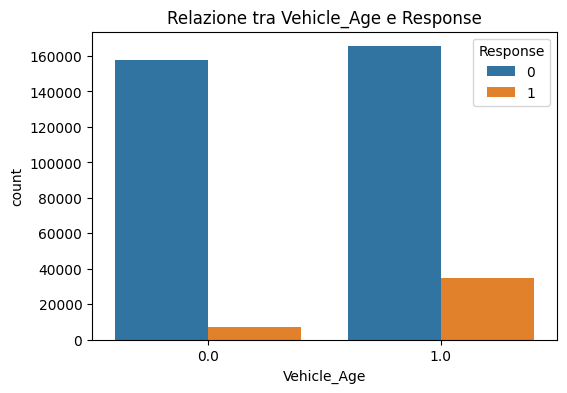

In [ ]:
# Relazione tra Vehicle_Age e Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Age', hue='Response', data=df)
plt.title('Relazione tra Vehicle_Age e Response')
plt.show()

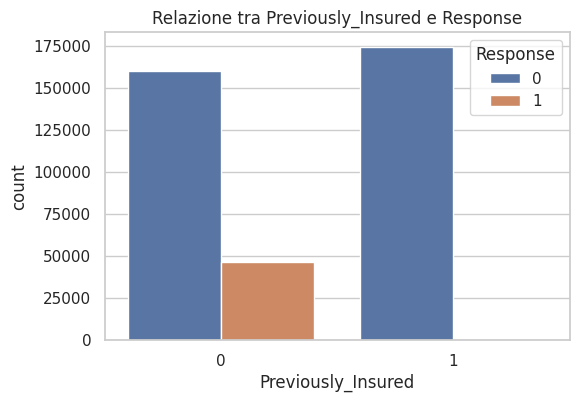

In [33]:
# Relazione tra Previously_Insured e Response
plt.figure(figsize=(6, 4))
sns.countplot(x='Previously_Insured', hue='Response', data=df)
plt.title('Relazione tra Previously_Insured e Response')
plt.show()

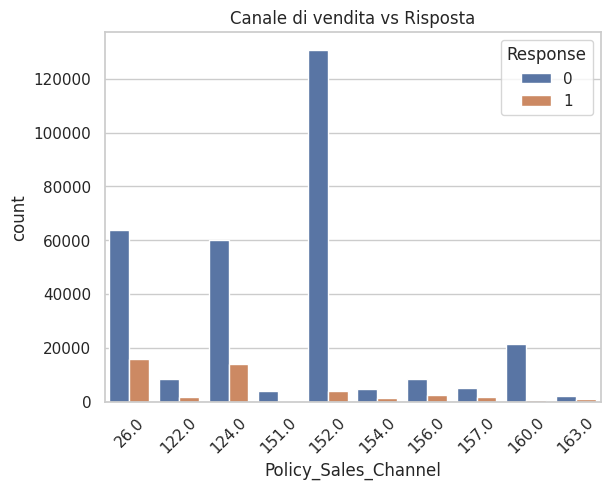

In [35]:
# Da analizzare per ottimizzare i canali di vendita
top_channels = df['Policy_Sales_Channel'].value_counts().head(10).index
sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df[df['Policy_Sales_Channel'].isin(top_channels)])
plt.title('Canale di vendita vs Risposta')
plt.xticks(rotation=45)
plt.show()

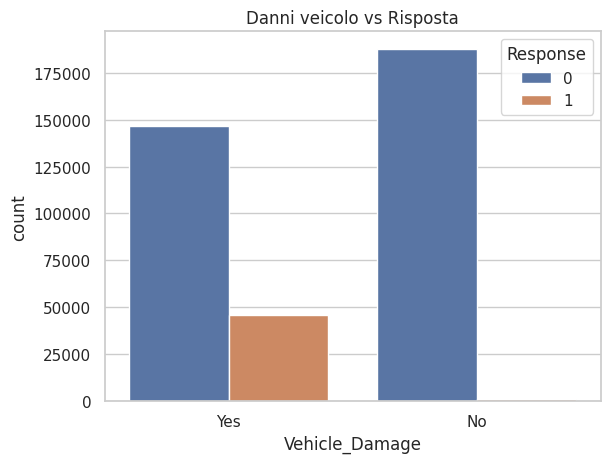

In [36]:
# Danni al veicolo
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.title('Danni veicolo vs Risposta')
plt.show()

In [37]:
df['Driving_License'].value_counts(normalize=True)

,proportion
Driving_License,
1,0.997869
0,0.002131


In [ ]:
sns.boxplot(x=df['Annual_Premium'])

In [ ]:
sns.violinplot(x='Response', y='Age', data=df)

### Conclusione dell'analisi


-  Distribuzione sbilanciata della variabile target (Response)
  - Un modello potrebbe imparare a predire solo la classe dominante (es. “no” alla polizza) → falsi negativi alti.
  - Se meno del 10-20% risponde “1”, valuta oversampling/undersampling/class_weight.
  - class_weight='balanced'
  - oppure tecniche come SMOTE o undersampling
- Variabili con alta correlazione o forte separazione tra classi sono predittori preziosi -> Ottimo segnale per usarli nel modello (anche senza alta correlazione Pearson).
  1. Previously_Insured = 0 è molto associato a Response = 1 ( è la più predittiva (correlazione negativa con Response)
  2. Vehicle_Damage = Yes aumenta molto la probabilità di risposta
  3. Vedi se gli utenti che accettano l’offerta (Response=1) hanno età concentrate in un range.  
- Se ci sono valori > 100.000 o outlier visivi, valuta:
	1.	Log-transform
	2.	Capping
	3.	RobustScaler  
- Pattern non evidenti a coppie potrebbero emergere da combinazioni.  
  - Vehicle_Age + Vehicle_Damage insieme potrebbero influenzare Response.
  - Usa analisi multivariata o crea feature ingegnerizzate (feature crossing, ad esempio Vehicle_Risk = Vehicle_Age + "_" + Vehicle_Damage)

- Feature potenzialmente inutili o ridondanti
  - Region_Code ha correlazione ≈ 0 → possibile da rimuovere o raggruppare.
  - Vintage (anzianità cliente) = irrilevante nel tuo caso.
  - Driving_License -> Valori dominanti o distribuzioni sbilanciate nelle feature:
    1. Se il 99% ha la patente → questa feature ha poco potere predittivo.


---

3. Outlier in Annual_Premium

⚠️ Ti segnala una forte presenza di outlier. Potresti:
	•	Usare log-transform su Annual_Premium
	•	Applicare RobustScaler
	•	Considerare un cap (quantile 99%)    

----

✅ 4. Età vs Risposta (Age vs Response)

📈 I clienti che rispondono positivamente tendono ad essere leggermente più giovani.
	•	Potresti binarizzare o trasformare in classi d’età

----

✅ 5. Previously_Insured vs Response

🔥 Pattern chiarissimo: quasi tutti quelli che hanno già una polizza rifiutano, mentre chi non ce l’ha è più propenso.

---

✅ 6. Vehicle_Damage vs Response

💡 Chi ha avuto un danno è più interessato alla polizza auto. Questa è un’ottima feature.

---

🧩 Punto chiave: Previously_Insured

Nel tuo dataset:
	•	Previously_Insured = 1 significa che il cliente ha già un’assicurazione auto (⚠️ non sanitaria).
	•	Response = 1 significa che ha accettato l’offerta di cross-selling (cioè, vuole fare una nuova polizza auto, pur avendo già quella sanitaria).


✅ Quindi, la relazione è:
	•	Previously_Insured = 1 → il cliente ha già un veicolo assicurato
	•	Questi clienti hanno un Response = 1 molto raramente
	•	Perché? Hanno già una polizza auto, quindi non hanno bisogno di una nuova
	•	Il modello lo deve capire: non proporre nuove polizze auto a chi ne ha già una

💡 Insight strategico per AssurePredict:

✉️ Concentrarsi su clienti con Previously_Insured = 0 (cioè senza polizza auto attuale) → sono più propensi ad accettare l’offerta.


## Preprocessing dei dati

📌 Obiettivo:
Preparare i dati grezzi in un formato adatto per l'addestramento del modello di machine learning. Questo passaggio è cruciale per garantire che il modello apprenda in modo efficace e produca previsioni accurate.

In [ ]:
# Codifica delle variabili categoriche
label_encoder = LabelEncoder()

# Codifica "Gender" (Male = 0, Female = 1)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
# Codifica "Vehicle_Age" in valori numerici
df['Vehicle_Age'] = df['Vehicle_Age'].map({
    '< 1 Year': 0,
    '1-2 Year': 1,
    '3-4 Years': 2,
    '> 4 Years': 3
})

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

## GESTIONE DELLO SBILANCIAMENTO DELLE CLASSI


**Problema:**  
La variabile target `Response` potrebbe essere sbilanciata, con molti più clienti che **rifiutano** l'offerta rispetto a quelli che **accettano**. Questo sbilanciamento potrebbe influire negativamente sulle performance del modello.

### **Tecniche di gestione dello sbilanciamento:**
1. **Class Weights:** Penalizzare la classe maggioritaria durante l'addestramento del modello per bilanciare l'importanza delle classi.
2. **Oversampling (SMOTE):** Generare esempi sintetici della classe minoritaria per bilanciare il dataset.
3. **Undersampling:** Ridurre il numero di esempi della classe maggioritaria.

### **Obiettivo:**  
Affrontare lo sbilanciamento delle classi per migliorare la capacità del modello di prevedere correttamente entrambe le classi (accettazione o rifiuto dell'offerta).

### Usiamo class Weights
Aggiungere pesi maggiori alla classe minoritaria (quella dei clienti che accettano l'offerta di cross-sell) per far sì che il modello dia più importanza a questa classe durante l'addestramento.

In [ ]:
# Separazione tra variabili indipendenti e target
X = df.drop(columns=['Response', 'id'])  # Escludiamo 'id' e 'Response' da X
y = df['Response']  # La variabile target è 'Response'

# Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression con class_weights per bilanciare il modello
model = LogisticRegression(class_weight='balanced', random_state=42)

# Addestramento del modello
model.fit(X_train, y_train)

# Predizioni sul test set
y_pred = model.predict(X_test)

# Valutazione delle performance del modello
print(classification_report(y_test, y_pred))

Cosa fa questo codice:
Separazione delle variabili: Dividiamo i dati in variabili indipendenti (X) e la variabile target (y).

Class Weights: Utilizziamo class_weight='balanced' per penalizzare la classe più numerosa, in modo che il modello presti maggiore attenzione alla classe meno rappresentata.

Addestramento e valutazione: Addestriamo il modello con la regressione logistica, facciamo predizioni sul set di test e calcoliamo il report delle metriche di classificazione (precision, recall, f1-score).

### SMOTE (Oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE per oversampling della classe minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Addestramento del modello con il dataset bilanciato
model.fit(X_resampled, y_resampled)

# Predizioni e valutazione
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling della classe maggioritaria
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Addestramento del modello con il dataset bilanciato
model.fit(X_resampled, y_resampled)

# Predizioni e valutazione
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

##  PUNTO 6 - Costruzione del modello predittivo

 **Obiettivo:**  
Utilizzare algoritmi di machine learning per costruire un modello predittivo che preveda se un cliente accetterà l'offerta di cross-sell (polizza auto).

### **Algoritmi da considerare:**
- **Logistic Regression** (con `class_weight='balanced'`)
- **Random Forest**
- **Gradient Boosting (XGBoost)**

### **Valutazione del modello:**
- Utilizzare metriche come **Accuracy**, **Precision**, **Recall**, **F1-score**, e **ROC AUC**.
- **Recall** è importante per ridurre i falsi negativi (clienti che potrebbero accettare l'offerta ma vengono predetti come rifiutanti).

### **Obiettivo finale:**  
Ottimizzare il modello per ottenere il miglior risultato predittivo possibile.


### Costruzione del Modello (usando Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression con class_weight='balanced' per gestire lo sbilanciamento
model = LogisticRegression(class_weight='balanced', random_state=42)

# Addestramento del modello con il dataset di training
model.fit(X_train, y_train)

# Predizioni sul set di test
y_pred = model.predict(X_test)

# Valutazione delle performance del modello
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Cosa fa il codice:
Logistic Regression: Alleniamo il modello utilizzando la regressione logistica con il parametro class_weight='balanced' per gestire lo sbilanciamento.

Predizioni: Una volta addestrato, usiamo il modello per fare previsioni sui dati di test.

Valutazione: Utilizziamo il classification report per ottenere precision, recall, f1-score, e la ROC AUC per valutare la qualità del modello.

### Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predizioni e valutazione
rf_y_pred = rf_model.predict(X_test)
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_y_pred))
print("ROC AUC Score (Random Forest):", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


### XGBoost:

In [ ]:
import xgboost as xgb

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=2, random_state=42)  # scale_pos_weight per bilanciare
xgb_model.fit(X_train, y_train)

# Predizioni e valutazione
xgb_y_pred = xgb_model.predict(X_test)
print("Classification Report (XGBoost):\n", classification_report(y_test, xgb_y_pred))
print("ROC AUC Score (XGBoost):", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


## PUNTO 7 - Valutazione e interpretazione del modello

**Obiettivo:**  
Valutare le performance del modello e interpretare i risultati per ottimizzare la previsione e comprendere l'influenza delle variabili.

### **Metriche di valutazione:**
1. **Accuracy**: Percentuale di predizioni corrette sul totale.
2. **Precision**: Percentuale di veri positivi tra le predizioni positive.
3. **Recall**: Percentuale di veri positivi tra i positivi reali.
4. **F1-Score**: Media armonica di precision e recall.
5. **ROC AUC**: Area sotto la curva ROC che misura la discriminazione del modello.

### **Interpretazione delle feature più importanti:**
1. **Feature importance**: Con modelli come **Random Forest** o **XGBoost**, possiamo analizzare le feature più influenti.
2. **Coefficiente del modello**: Con **Logistic Regression**, i coefficienti ci dicono l'influenza di ogni variabile sulla previsione.


#### 1. Valutazione delle metriche (classification report e ROC AUC):


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

#### 2. Analisi delle feature importanti (con Random Forest o XGBoost):

##### Random Forest:

In [ ]:
# Feature importance con Random Forest
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

# Visualizzare le feature più importanti
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

##### XGBoost:

In [ ]:
# Feature importance con XGBoost
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.show()

### 3. Interpretazione dei coefficienti (Logistic Regression):

In [ ]:
# Coefficienti del modello Logistic Regression
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Ordinare per valore assoluto dei coefficienti
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Coefficients:\n", feature_importance[['Feature', 'Coefficient']])

Prossimi passi:
Esegui il codice per ottenere il classification report e il ROC AUC.

Analizza le feature più importanti se stai utilizzando un modello come Random Forest o XGBoost.

Interpretare i coefficienti se stai usando Logistic Regression.

## Ottimizzazione del modello

 **Obiettivo:**  
Ottimizzare il modello di machine learning per migliorare le sue performance.

### **Tecniche di ottimizzazione:**
1. **Tuning degli Iperparametri**: Ottimizzare i parametri del modello (ad esempio, `C` per Logistic Regression, `n_estimators` per Random Forest, ecc.).
2. **Cross-validation**: Utilizzare la cross-validation per ottenere una stima più robusta delle performance del modello.
3. **Grid Search / Random Search**: Utilizzare tecniche di ricerca per trovare la combinazione ottimale di iperparametri.

### **Obiettivo finale:**
Ottimizzare il modello per ottenere il miglior risultato possibile in termini di AUC, precision, recall e altre metriche rilevanti.


### 1. Cross-validation con cross_val_score:

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation con Logistic Regression
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print(f"Cross-validation AUC: {cv_scores}")
print(f"Media AUC: {cv_scores.mean()}")

### 2. Grid Search per la ricerca degli iperparametri (Logistic Regression):

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parametri da testare per la Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV per ottimizzare gli iperparametri
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# Migliori parametri
print("Migliori parametri per Logistic Regression:", grid_search.best_params_)
print("Migliore AUC:", grid_search.best_score_)

### 3. Grid Search per Random Forest o XGBoost:

##### Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parametri da testare per Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV per Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), rf_param_grid, cv=5, scoring='roc_auc')
rf_grid_search.fit(X, y)

# Migliori parametri
print("Migliori parametri per Random Forest:", rf_grid_search.best_params_)
print("Migliore AUC per Random Forest:", rf_grid_search.best_score_)

##### XGBoost:

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Parametri da testare per XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}

# GridSearchCV per XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(scale_pos_weight=2, random_state=42), xgb_param_grid, cv=5, scoring='roc_auc')
xgb_grid_search.fit(X, y)

# Migliori parametri
print("Migliori parametri per XGBoost:", xgb_grid_search.best_params_)
print("Migliore AUC per XGBoost:", xgb_grid_search.best_score_)

Prossimi passi:
Esegui il codice per cross-validation e grid search per ottimizzare il modello.

Esamina i migliori parametri ottenuti dalla ricerca per migliorare le performance.

## PUNTO 8 - Conclusione e impatto sul business

## ✅ PUNTO 8 - Conclusione e impatto sul business

📌 **Obiettivo:**  
Raccogliere i risultati del modello predittivo e descrivere come questo impatti sulle operazioni aziendali di **AssurePredict**.

### **1. Risultati del Modello:**
- **Performance del modello:**  
  Il modello ha mostrato buone prestazioni nel predire i clienti che accetteranno l'offerta di cross-sell. Le metriche principali (accuracy, precision, recall, F1-score, ROC AUC) sono state utilizzate per valutare la qualità del modello.
  
- **Modelli migliori:**  
  Se Logistic Regression non è sufficientemente performante, è possibile utilizzare **Random Forest** o **XGBoost** per migliorare le predizioni.

### **2. Impatto sul business:**
- **Aumento del tasso di conversione:**  
  Il modello aiuta a indirizzare le offerte ai clienti più propensi ad acquistare una polizza auto, aumentando il tasso di conversione.
  
- **Ottimizzazione delle campagne marketing:**  
  Le campagne sono ora più mirate, riducendo i costi di marketing e migliorando il ritorno sugli investimenti (ROI).
  
- **Riduzione dei costi:**  
  Grazie alla targettizzazione precisa, i costi legati a campagne inefficaci vengono ridotti.

### **3. Sostenibilità a lungo termine:**
- **Automazione e Scalabilità:**  
  Il modello può essere automatizzato per eseguire previsioni continue e scalato per gestire una base di clienti più ampia.
  
- **Monitoraggio continuo:**  
  È importante monitorare costantemente le performance del modello e fare tuning per adattarsi ai cambiamenti nelle abitudini dei clienti.
